In [2]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from sklearn.metrics import matthews_corrcoef

$$ Отбор признаков. Мультиколлинеарность $$

→ Ещё одним важным этапом в жизненном цикле машинного обучения и в проектировании признаков является отбор признаков.

> Отбор признаков — процесс выбора важных признаков, наиболее влияющих на предсказание.

Например, если бы мы делали отбор признаков для задачи сомелье винных обзоров, мы бы отобрали те признаки, что больше всего влияют на рейтинг вина.

Отбор признаков помогает:

1. Сократить время обучения. Чем меньше данных, тем быстрее обучается модель. Например, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше 500, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше 100.

2. Повысить качество предсказания. Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют мультиколлинеарностью, которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните Работа с пропусками: методы обработки.

> Мультиколлинеарность — сильная корреляционная связь между признаками, отбираемыми для обучения. 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

Некоторые модели плохо работают на данных с мультиколлинеарностью. Вы узнаете об этом позже в модулях про машинное обучение.

Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

 Рассмотрим отбор признаков в Python. Для этого воспользуемся обучающим датасетом о цветках ириса.

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal length — длина наружной доли околоцветника;
- sepal width — ширина наружной доли околоцветника;
* petal length — длина внутренней доли околоцветника;
- petal width — ширина внутренней доли околоцветника.

In [12]:
iris = pd.read_csv('Data\iris.zip')
iris.head()

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\HP\AppData\Local\Temp\ipykernel_4988\503429798.py:1: SyntaxWarning: invalid escape sequence '\i'
  iris = pd.read_csv('Data\iris.zip')


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.

Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<Axes: >

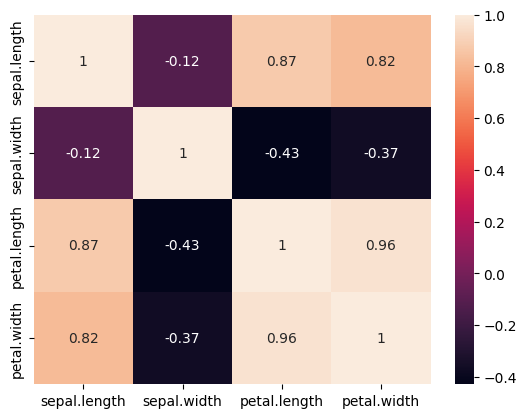

In [13]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

Чтобы построить модель на этом наборе данных, сделаем отбор признаков — удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше).

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: sepal.length и petal.width, petal.length и sepal.length, petal.width и petal.length.

Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

In [14]:
iris = iris.drop(['petal.width'], axis=1)
#Однако второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length. Удалим и его:

iris = iris.drop(['petal.length'], axis=1)

In [15]:
#Посмотрим на результат:
iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


<Axes: >

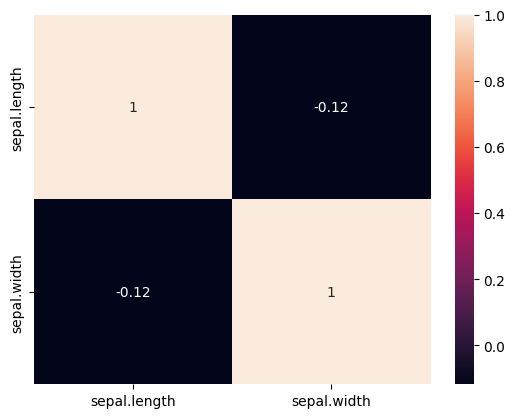

In [16]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

У нас осталось всего два признака с коэффициентом корреляции -0.12: sepal.width и sepal.length, и признак, который необходимо предсказать — variety. Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Это означает, что всего два признака — sepal length (длина наружной доли околоцветника) и sepal width (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки petal length (длина внутренней доли околоцветника) и petal width (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

Таким образом, анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация. 

Пример

> Если мы округлим длину чашелистика и запишем её в новый признак sepal.length.round,

In [17]:
# Округление длины чашелистика и сохранение в новую колонку 'sepal.length.round'
iris['sepal.length.round'] = iris['sepal.length'].round()

In [18]:
iris.head()

,sepal.length,sepal.width,variety,sepal.length.round
0,5.1,3.5,Setosa,5.0
1,4.9,3.0,Setosa,5.0
2,4.7,3.2,Setosa,5.0
3,4.6,3.1,Setosa,5.0
4,5.0,3.6,Setosa,5.0


то корреляция исходного признака sepal.length и нового признака sepal.length.round будет очень сильной. Это изображено на тепловой карте ниже.

<Axes: >

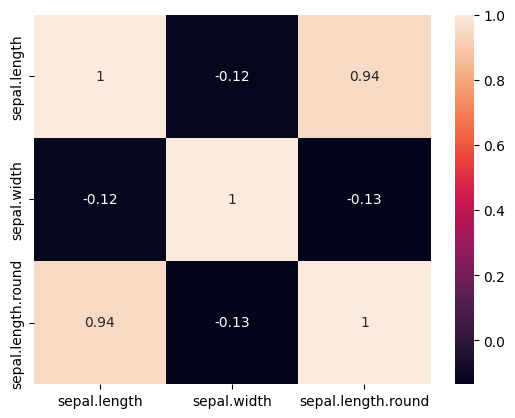

In [19]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

Корреляция между исходным признаком sepal.length и новым признаком sepal.length.round составила 0.94. При отборе признаков один из них необходимо удалить. В этом случае лучше выбрать sepal.length.round, так как с целым числом удобнее работать.

$$ Задание $$
Какие из признаков имеют самую сильную корреляционную связь?

In [20]:
df = pd.read_csv('Data\wine_cleared.zip')
# для удобства сразу преобразуем признак в int
df['price_round'] = df['price'].round().astype(int)
# регулярное выражение для нахождения чисел regex = '\d{4}' 
df['year'] = df['title'].str.findall(r'\d{4}').str.get(0)
# Создаем новый бинарный признак 'is_usa'
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)
# Создаем новый бинарный признак 'is_france'
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
# Создаем новый бинарный признак 'is_italy'
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)
# Преобразуем признак 'year' в целочисленный тип 'int64'
#df['year'] = df['year'].apply(lambda x: int(x) if type(x) == str else x)
df['year'] = df['year'].astype('Int64')
# Создаем новый бинарный признак old_wine
#df['old_wine'] = df['year'].apply(lambda x: 1 if x < 2010 else 0)
#новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
regex = '((.*?))'
df['locality'] = df['title'].str.findall(regex)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_4988\3481326074.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv('Data\wine_cleared.zip')


In [22]:
import category_encoders as ce
#ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING
#Однократное кодирование (его ещё часто называют «горячим») является автоматизированным кодированием

encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(df['taster_name'])
df = pd.concat([df, type_bin], axis=1)

In [24]:
df = df.drop(columns=['taster_name_19','taster_name_17', 'taster_name_15', 'taster_name',
                      'taster_name_13', 'taster_name_11', 'Unnamed: 0',
                      'taster_name_9', 'taster_name_7', 'taster_name_6', 'taster_name_5', 
                      'taster_name_4', 'taster_name_3'], axis=1)

In [31]:
df = df.drop(columns=['year'], axis=1)

<Axes: >

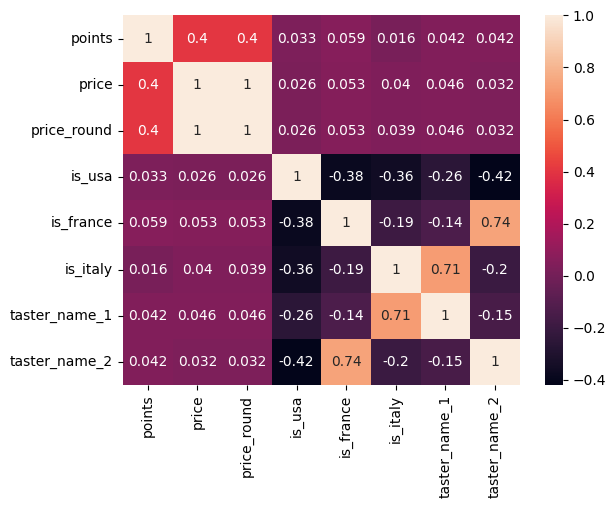

In [32]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df.corr(numeric_only=True), annot=True)

Ответ price и price_round имеют самую сильную корреляционную связь.

$$ Задание $$
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.

<Axes: >

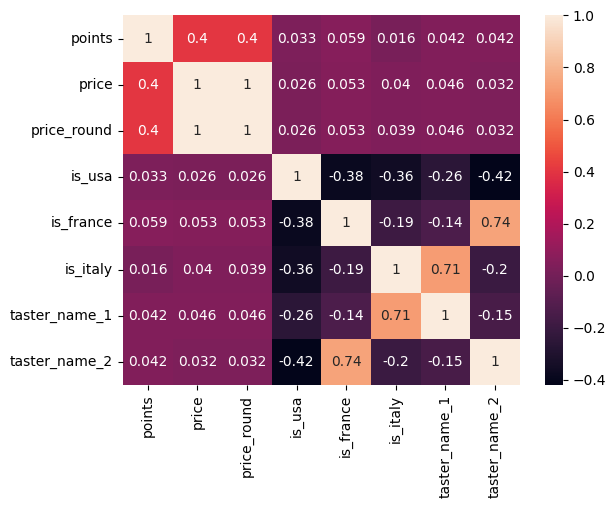

In [33]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [35]:
df = df.drop(columns=['taster_name_2'], axis=1)

<Axes: >

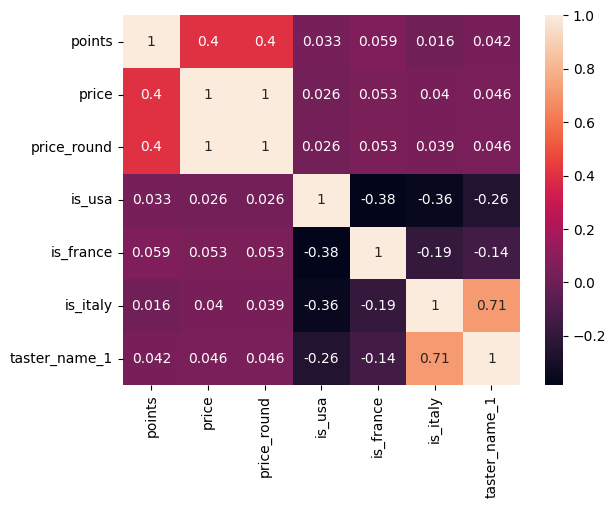

In [36]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [37]:
df = df.drop(columns=['taster_name_1'], axis=1)

<Axes: >

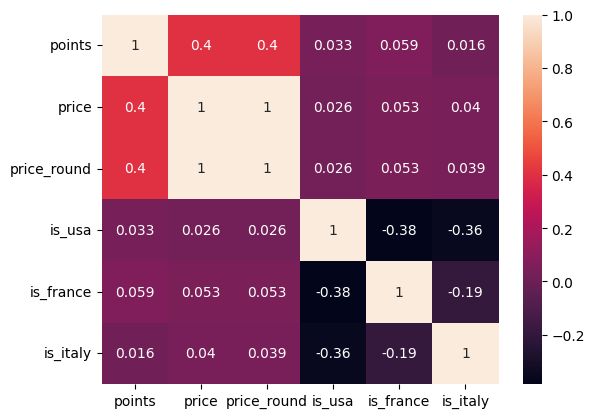

In [38]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [69]:
df = pd.read_csv('Data\wine_cleared.zip')
# для удобства сразу преобразуем признак в int
df['price_round'] = df['price'].round().astype(int)
# регулярное выражение для нахождения чисел regex = '\d{4}' 
df['year'] = df['title'].str.findall(r'\d{4}').str.get(0)
# Создаем новый бинарный признак 'is_usa'
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)
# Создаем новый бинарный признак 'is_france'
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
# Создаем новый бинарный признак 'is_italy'
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)
# Преобразуем признак 'year' в целочисленный тип 'int64'
#df['year'] = df['year'].apply(lambda x: int(x) if type(x) == str else x)
df['year'] = df['year'].astype('Int64')
# Создаем новый бинарный признак old_wine
#df['old_wine'] = df['year'].apply(lambda x: 1 if x < 2010 else 0)
#новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
regex = '((.*?))'
df['locality'] = df['title'].str.findall(regex)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\HP\AppData\Local\Temp\ipykernel_4988\3481326074.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv('Data\wine_cleared.zip')


<Axes: >

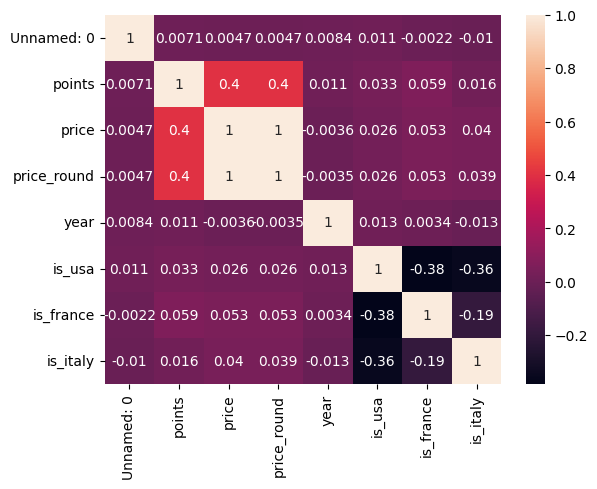

In [49]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: >

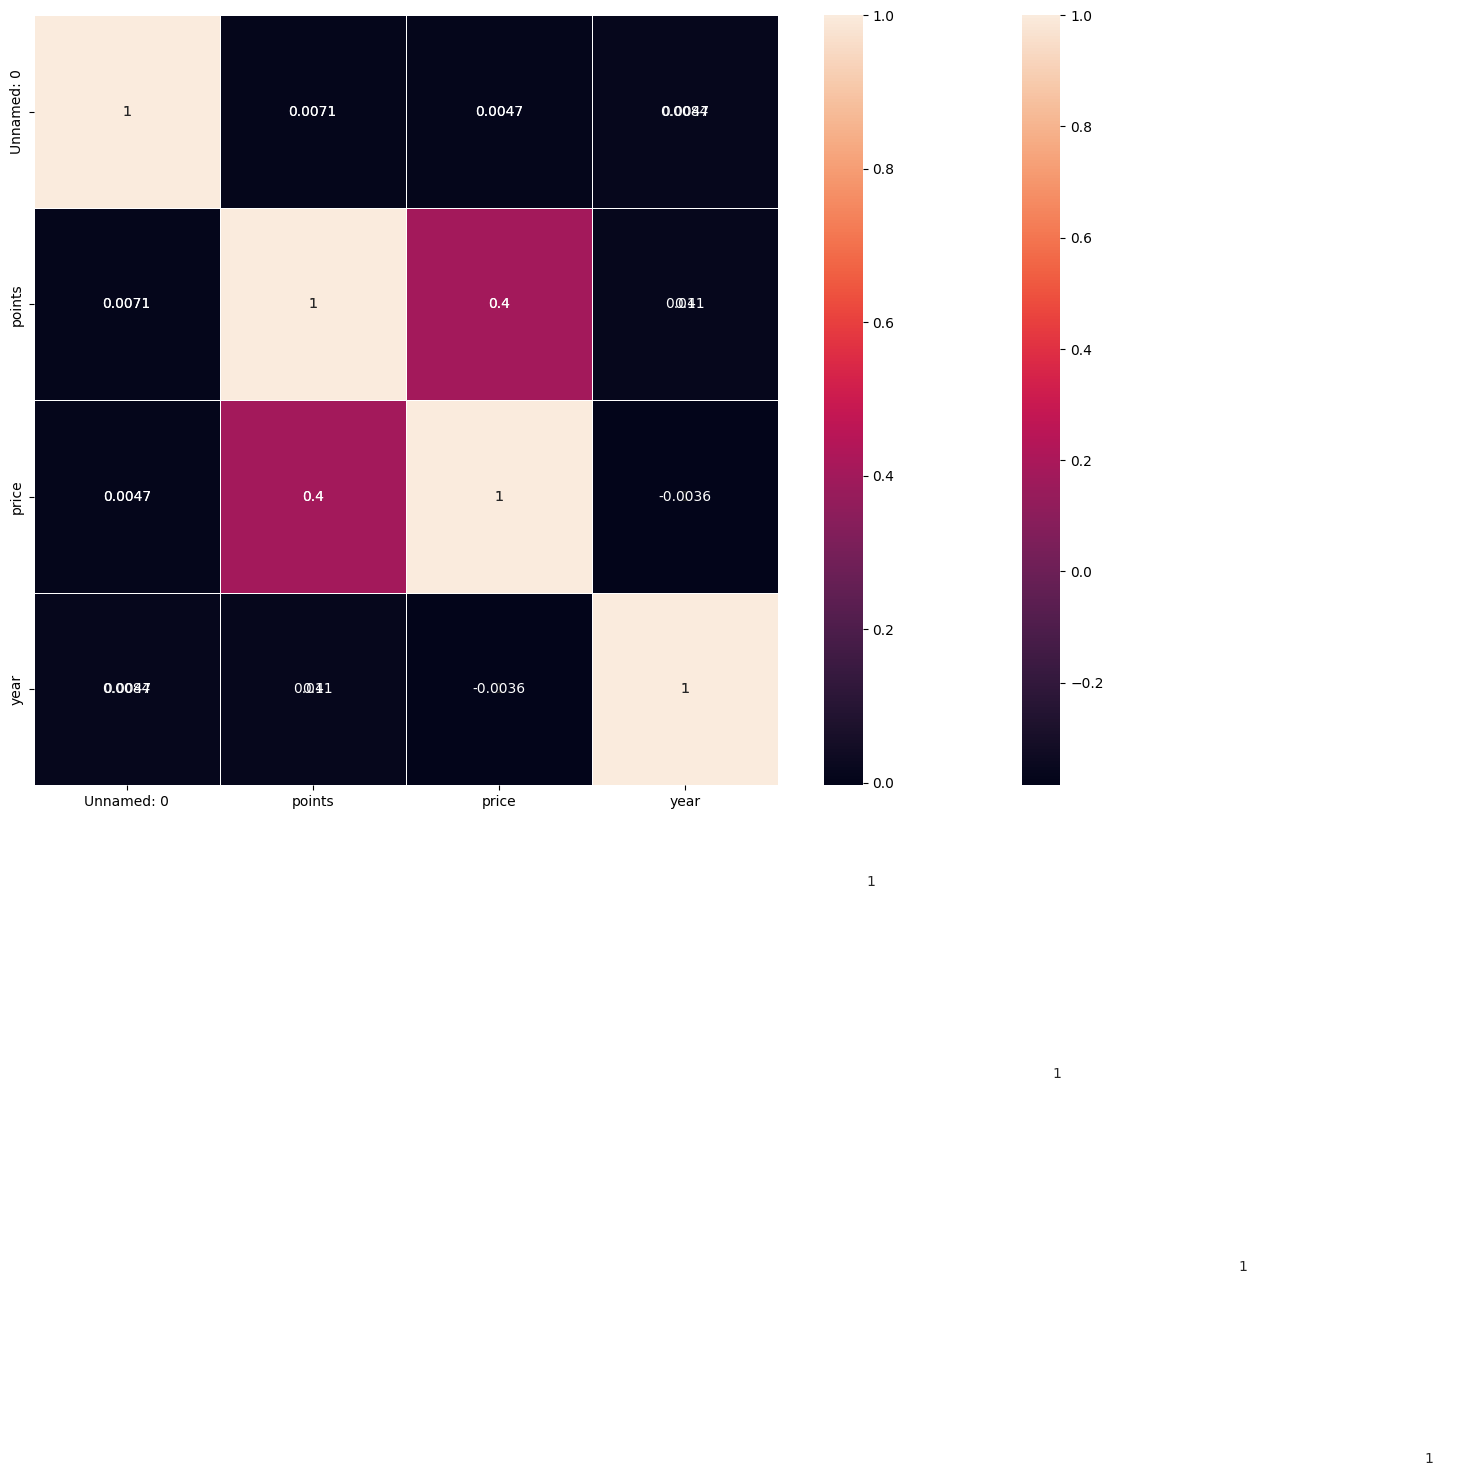

In [70]:
# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.

# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
df = df.drop(['is_usa', 'is_france', 'is_italy', 'price_round'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)